In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Gaather

In [13]:
df = pd.read_csv(r'C:\Users\ilesannmi\Desktop\Projectssss___\Job Placement Dataset\Job_Placement_Data.csv')

In [14]:
df.head(3)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed


### Labelling

In [15]:

## Label Encoding
from sklearn.preprocessing import LabelEncoder
df_new = df.copy() #backup for Labeling


In [16]:
#labelling objects datatypes only

for col in df_new.columns:
    if df_new[col].dtype == 'object':
        le = LabelEncoder()
        df_new[col] = le.fit_transform(df_new[col])

In [17]:

df.head(10)


,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed
5,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed
6,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed
8,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed
9,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed


In [18]:
df_new.head(10)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.00,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.50,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.00,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.00,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.80,0,55.50,1
5,1,55.00,1,49.80,1,2,67.25,2,1,55.00,0,51.58,0
6,0,46.00,1,49.20,1,1,79.00,0,0,74.28,0,53.29,0
7,1,82.00,0,64.00,0,2,66.00,2,1,67.00,0,62.14,1
8,1,73.00,0,79.00,0,1,72.00,0,0,91.34,0,61.29,1
9,1,58.00,0,70.00,0,1,61.00,0,0,54.00,0,52.21,0


## Dropping status- y and other columns as X


In [19]:


X = df_new.drop('status', axis = 1)
y = df_new['status']

In [20]:
X.head(2)


,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28


In [21]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int32

### *Splitting*


In [22]:

# Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 45)


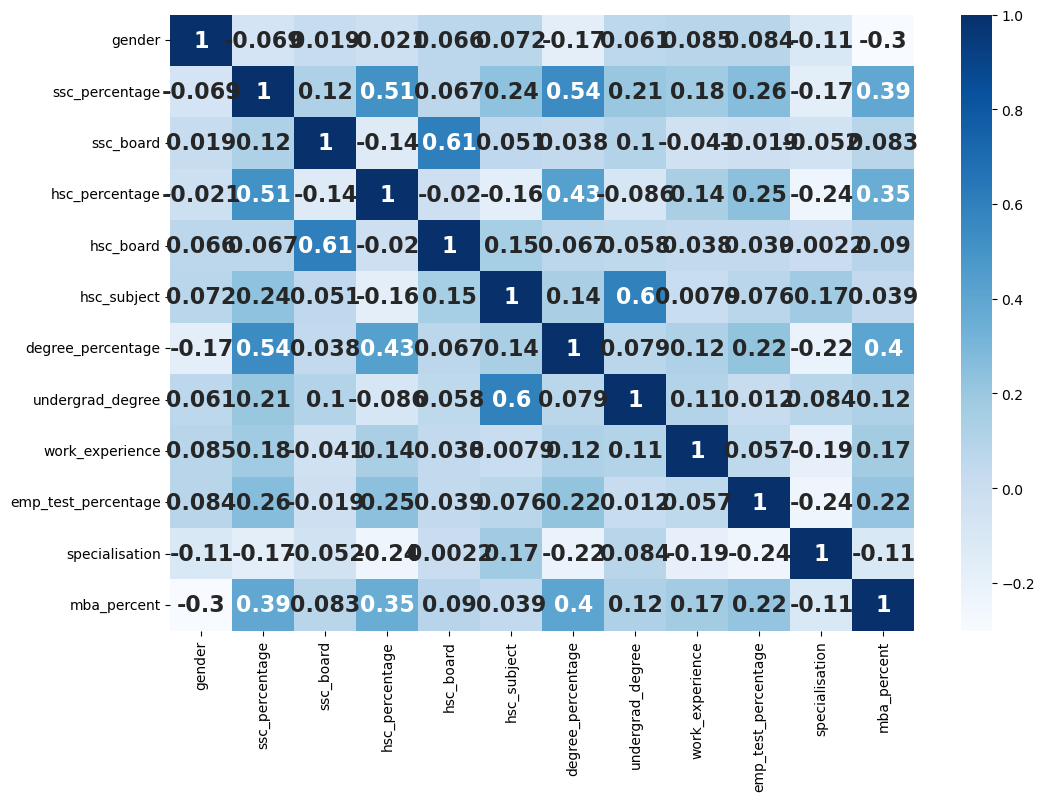

In [23]:
X.corr()
plt.figure(figsize=(12,8))

sns.heatmap(X.corr(), cmap='Blues', annot =True, annot_kws={'fontsize':16, 'fontweight':'bold'})
plt.show()


In [24]:


#### USING A VARYING THRESHOLD
threshold = 0.5

def correlation(dataset, threshold):
    column_correlation = set()
    correlation_matrix = dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j]) > threshold:
                column_name = correlation_matrix.columns[i]
                column_correlation.add(column_name)
    return column_correlation


correlation(X, threshold)



{'degree_percentage', 'hsc_board', 'hsc_percentage', 'undergrad_degree'}

In [25]:
X.head(3)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80


## Now scaling the higher values to reduce its influence on the model

In [26]:

## MinmaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [27]:
X

array([[1.        , 0.53823954, 1.        , ..., 0.10416667, 1.        ,
        0.28448276],
       [1.        , 0.79241394, 0.        , ..., 0.76041667, 0.        ,
        0.56484258],
       [1.        , 0.49701093, 0.        , ..., 0.52083333, 0.        ,
        0.2470015 ],
       ...,
       [1.        , 0.53823954, 1.        , ..., 0.1875    , 0.        ,
        0.69377811],
       [0.        , 0.68253968, 1.        , ..., 0.41666667, 1.        ,
        0.33808096],
       [1.        , 0.43516801, 0.        , ..., 0.8125    , 1.        ,
        0.33770615]])

### **In relatable term for Nigerians (cause i am proudly one),**

##### 10th grade class: this would typically correspond to the second year of senior secondary education (SS2), when students are around 16-17 years old. ---- 

##### 12th grade class: This would correspond to the final year of senior secondary education (SS3), when students are around 17-18 years old. At the end of this year, students take the SSSE, which is a high-stakes examination that can determine their eligibility for higher education or employment opportunities. ---- This relates to the **HSC_PERCENTAGE**
#### **So we have:**
##### 1. HighSchool Percentage
##### 2. HSC board
##### 3. Undergrad degree -- what faculty
##### 4. Degree Percetage

In [28]:

## Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver= 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [29]:


clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.93      0.90      0.91        41

    accuracy                           0.87        54
   macro avg       0.82      0.84      0.83        54
weighted avg       0.87      0.87      0.87        54



# **Features Selected**

In [30]:



# FEATURE SELECTION MODEL
featured_df = df[['degree_percentage', 'hsc_board', 'hsc_percentage', 'undergrad_degree']]
featured_df.head()


## since the columns are still objects
for col in featured_df.columns:
    if featured_df[col].dtype == 'object':
        le = LabelEncoder()
        featured_df[col] = le.fit_transform(featured_df[col])

C:\Users\ilesannmi\AppData\Local\Temp\ipykernel_12472\2731314615.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featured_df[col] = le.fit_transform(featured_df[col])


#### **Just to note: The y which is the placement column is still valid and the remaining column serves as X**

In [31]:

featured_df.head()

,degree_percentage,hsc_board,hsc_percentage,undergrad_degree
0,58.00,1,91.00,2
1,77.48,1,78.33,2
2,64.00,0,68.00,0
3,52.00,0,52.00,2
4,73.30,0,73.60,0


## SCaling and Splitting into **Test** and **Train**

In [86]:


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
featured_df = scaler.fit_transform(featured_df)
featured_df
X_feat = featured_df
feat_X_train, feat_X_test, feat_y_train, feat_y_test = train_test_split(X_feat, y, random_state= 50)

## Model training

In [87]:

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver= 'liblinear')
clf.fit(feat_X_test, feat_y_test)

print(clf.score(feat_X_test, feat_y_test))
feat_y_pred = clf.predict(feat_X_test)


0.7777777777777778


In [88]:
print(classification_report(feat_y_test, feat_y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.78      1.00      0.88        42

    accuracy                           0.78        54
   macro avg       0.39      0.50      0.44        54
weighted avg       0.60      0.78      0.68        54



c:\Users\ilesannmi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ilesannmi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ilesannmi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Over scaling the dataset**

In [44]:
# Overscaling the dataset
df.head()
df_overscaled = pd.concat([df] * 500, ignore_index= True)


In [45]:


df_overscaled.shape




(107500, 13)

In [46]:
df_overscaled.head()


,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [48]:

## since the columns are still objects
for col in df_overscaled.columns:
    if df_overscaled[col].dtype == 'object':
        le = LabelEncoder()
        df_overscaled[col] = le.fit_transform(df_overscaled[col])

In [49]:
df_overscaled.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


In [50]:

y_overscaled = df_overscaled.status

X_overscaled =  df_overscaled.drop('status', axis=1)

In [51]:
y_overscaled

0         1
1         1
2         1
3         0
4         1
         ..
107495    1
107496    1
107497    1
107498    1
107499    0
Name: status, Length: 107500, dtype: int32

In [52]:
X_overscaled

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...
107495,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49
107496,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62
107497,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72
107498,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23


In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_overscaled = scaler.fit_transform(X_overscaled)
featured_df


array([[0.19512195, 1.        , 0.88962109, 1.        ],
       [0.6702439 , 1.        , 0.68088962, 1.        ],
       [0.34146341, 0.        , 0.5107084 , 0.        ],
       [0.04878049, 0.        , 0.24711697, 1.        ],
       [0.56829268, 0.        , 0.6029654 , 0.        ],
       [0.42073171, 1.        , 0.21087315, 1.        ],
       [0.70731707, 1.        , 0.20098847, 0.        ],
       [0.3902439 , 0.        , 0.44481054, 1.        ],
       [0.53658537, 0.        , 0.69192751, 0.        ],
       [0.26829268, 0.        , 0.54365733, 0.        ],
       [0.24390244, 0.        , 0.39538715, 0.        ],
       [0.6902439 , 0.        , 0.51729819, 0.        ],
       [0.36585366, 1.        , 0.29654036, 0.        ],
       [0.2195122 , 0.        , 0.82372323, 0.        ],
       [0.        , 0.        , 0.16474465, 0.        ],
       [0.46341463, 0.        , 0.62602965, 0.        ],
       [0.3804878 , 0.        , 0.48105437, 0.        ],
       [0.34146341, 0.        ,

In [57]:
X_train_overscaled, X_test_overscaled, y_train_overscaled, y_test_overscaled = train_test_split(X_overscaled, y_overscaled, random_state= 45)


In [58]:
X_test_overscaled

array([[1.        , 0.66192538, 0.        , ..., 0.3125    , 1.        ,
        0.3661919 ],
       [0.        , 0.64131107, 0.        , ..., 0.11666667, 1.        ,
        0.54047976],
       [0.        , 0.68253968, 0.        , ..., 0.58333333, 1.        ,
        0.53785607],
       ...,
       [1.        , 0.50113379, 0.        , ..., 0.90416667, 0.        ,
        0.22976012],
       [0.        , 0.7237683 , 0.        , ..., 0.16666667, 1.        ,
        0.57421289],
       [1.        , 0.06411049, 0.        , ..., 0.296875  , 1.        ,
        0.27473763]])

In [61]:

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver= 'liblinear')
clf.fit(X_train_overscaled, y_train_overscaled)

print(clf.score(X_test_overscaled, y_test_overscaled))
y_overscaled_pred = clf.predict(X_test_overscaled)

0.8890046511627907


In [62]:
print(classification_report(y_test_overscaled, y_overscaled_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      8251
           1       0.92      0.92      0.92     18624

    accuracy                           0.89     26875
   macro avg       0.87      0.87      0.87     26875
weighted avg       0.89      0.89      0.89     26875



# **Dealing with Impabalance Data**